In [1]:
%set_env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [2]:
import import_ipynb
import dataset

importing Jupyter notebook from dataset.ipynb


In [3]:
import tensorflow as tf
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [4]:
model = sm.Unet('efficientnetb2', classes=1, activation='sigmoid')
model.load_weights('models/data_l_100e_b2.h5')

2024-02-14 13:17:42.457817: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-14 13:17:42.457841: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-14 13:17:42.457846: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-14 13:17:42.457905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-14 13:17:42.458147: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2024-02-14 13:18:04.995096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


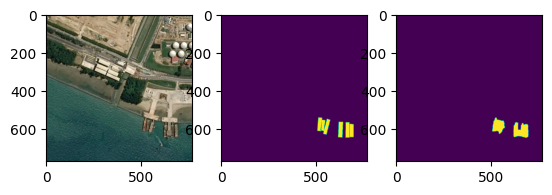

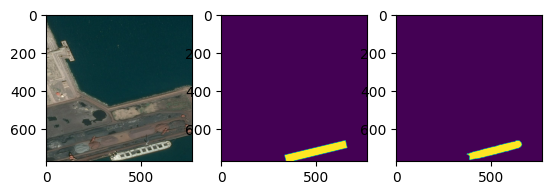

1/1 [==============================] - 0s 191ms/step


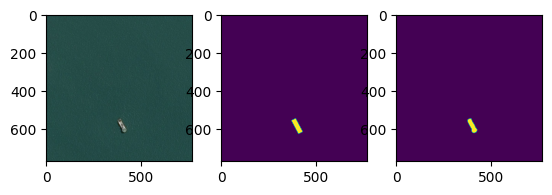

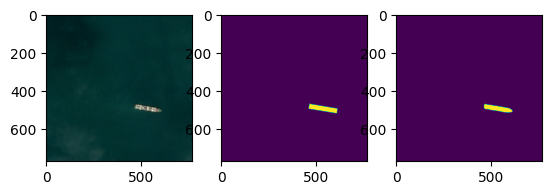

In [6]:
data_p_dir = 'data_p/s/'
ds = dataset.train_dataset(data_p_dir + 'image/', data_p_dir + 'mask/')

BATCH_SIZE = 2
item = ds.batch(BATCH_SIZE).skip(0).take(2)
for image, mask in item:
    pred = model.predict(image)
    for i in range(BATCH_SIZE):
        dataset.plot_image_mask_predict(image[i], mask[i], pred[i])
